# Data Preparation

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
#names of columns
names = ['Date', 'Instance Type', 'OS', 'Region', 'Price ($)']
#Reading Data
data = pd.read_csv('data/ap-northeast-1.csv',names=names)[::-1]
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d %H:%M:%S+00:00', utc=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957000 entries, 1956999 to 0
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Date           datetime64[ns]
 1   Instance Type  object        
 2   OS             object        
 3   Region         object        
 4   Price ($)      float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 74.7+ MB


In [4]:
data.head()

,Date,Instance Type,OS,Region,Price ($)
1956999,2017-03-30 07:25:12,m4.large,Windows,ap-northeast-1c,0.1210
1956998,2017-03-30 07:25:13,c3.2xlarge,Linux/UNIX,ap-northeast-1c,0.0976
1956997,2017-03-30 07:25:13,c3.2xlarge,SUSE Linux,ap-northeast-1c,0.1976
1956996,2017-03-30 07:25:13,m4.xlarge,Windows,ap-northeast-1c,0.2394
1956995,2017-03-30 07:25:16,g2.2xlarge,Windows,ap-northeast-1c,0.1183


In [5]:
len(data['Instance Type'].value_counts())

62

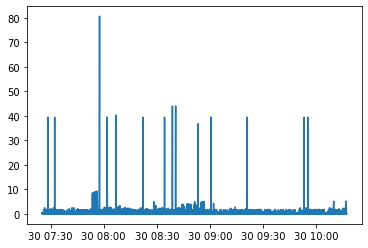

In [6]:
plt.plot(data['Date'][:10000],data['Price ($)'][:10000])

In [7]:
data.tail()

,Date,Instance Type,OS,Region,Price ($)
4,2017-05-08 21:46:17,c4.8xlarge,SUSE Linux,ap-northeast-1a,0.7890
3,2017-05-08 21:46:34,i3.large,Linux/UNIX,ap-northeast-1c,0.0223
2,2017-05-08 21:46:34,i3.large,SUSE Linux,ap-northeast-1c,0.1223
1,2017-05-08 21:46:36,c3.8xlarge,Windows,ap-northeast-1c,1.7461
0,2017-05-08 21:46:36,c3.8xlarge,Windows,ap-northeast-1a,1.6503


In [8]:
# Function to take advantage of date feature
def add_datepart(df, fldname, drop=False):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
        
    df.index = df[fldname]
    if drop: df.drop(fldname, axis=1, inplace=True)
    
    df.drop(['Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'],axis=1,inplace=True)
    
    return df

In [9]:
data = add_datepart(data,'Date')

In [10]:
data.head()

,Date,Instance Type,OS,Region,Price ($),Year,Month,Week,Day,Dayofweek,Dayofyear
Date,,,,,,,,,,,
2017-03-30 07:25:12,2017-03-30 07:25:12,m4.large,Windows,ap-northeast-1c,0.1210,2017,3,13,30,3,89
2017-03-30 07:25:13,2017-03-30 07:25:13,c3.2xlarge,Linux/UNIX,ap-northeast-1c,0.0976,2017,3,13,30,3,89
2017-03-30 07:25:13,2017-03-30 07:25:13,c3.2xlarge,SUSE Linux,ap-northeast-1c,0.1976,2017,3,13,30,3,89
2017-03-30 07:25:13,2017-03-30 07:25:13,m4.xlarge,Windows,ap-northeast-1c,0.2394,2017,3,13,30,3,89
2017-03-30 07:25:16,2017-03-30 07:25:16,g2.2xlarge,Windows,ap-northeast-1c,0.1183,2017,3,13,30,3,89


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1957000 entries, 2017-03-30 07:25:12 to 2017-05-08 21:46:36
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Date           datetime64[ns]
 1   Instance Type  object        
 2   OS             object        
 3   Region         object        
 4   Price ($)      float64       
 5   Year           int64         
 6   Month          int64         
 7   Week           int64         
 8   Day            int64         
 9   Dayofweek      int64         
 10  Dayofyear      int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 179.2+ MB


In [12]:
# converting categorical features
categorical_columns=['Instance Type', 'OS', 'Region']

unique_instance=sorted(data['Instance Type'].unique())
string1 = 'Instance_Type_'
instance_columns=[string1 + x for x in unique_instance]

In [13]:
data[categorical_columns] = data[categorical_columns].apply(LabelEncoder().fit_transform)

In [14]:
# making multiple features from instance feature
oe_enc = OneHotEncoder()
data_oneHot = oe_enc.fit_transform(np.array(data['Instance Type']).reshape(-1,1))
data_cat = pd.DataFrame(data_oneHot.toarray(),columns=instance_columns,index=data.Date)

data = data.join(data_cat)
data.drop(['Date','Instance Type','Year'],axis=1,inplace=True)


In [15]:
data.head()

,OS,Region,Price ($),Month,Week,Day,Dayofweek,Dayofyear,Instance_Type_c1.medium,Instance_Type_c1.xlarge,...,Instance_Type_r3.xlarge,Instance_Type_r4.16xlarge,Instance_Type_r4.2xlarge,Instance_Type_r4.4xlarge,Instance_Type_r4.8xlarge,Instance_Type_r4.large,Instance_Type_r4.xlarge,Instance_Type_t1.micro,Instance_Type_x1.16xlarge,Instance_Type_x1.32xlarge
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-30 07:25:12,2,1,0.1210,3,13,30,3,89,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-03-30 07:25:13,0,1,0.0976,3,13,30,3,89,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-03-30 07:25:13,0,1,0.0976,3,13,30,3,89,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-03-30 07:25:13,0,1,0.0976,3,13,30,3,89,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-03-30 07:25:13,1,1,0.1976,3,13,30,3,89,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# splitting data into train and validation 
train_data = data[data.index<('2017-05-01')]
test_data = data[data.index>=('2017-05-01')]

In [18]:
price_train=train_data['Price ($)']
train_data.drop('Price ($)',axis=1,inplace=True)

price_test= test_data['Price ($)']
test_data.drop('Price ($)',axis=1,inplace=True)

c:\users\soura\anaconda3\envs\tensorflow_gpu\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
# Dump data to train folder
#%mkdir train
train_data = train_data[-50000:]
price_train = price_train[-50000:]
train_data.to_csv('train/train.csv',columns=None,index=False,header=False)
price_train.to_csv('train/train_op.csv',columns=None,index=False,header=False)

In [20]:
# dump data to validation folder
#%mkdir validation
test_data = test_data[:10000]
test_data.to_csv('validation/test.csv',columns=None,index=False,header=False)
price_test = price_test[:10000]
price_test.to_csv('validation/test_op.csv',columns=None,index=False,header=False)

In [21]:
# Clear memory
%reset -f

# Training models

In [2]:
from Model import CNN,Lstm,ConvLstm

Using TensorFlow backend.
c:\users\soura\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\soura\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\soura\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\soura\anaco

## CNN

In [3]:
model = CNN('train','validation',epochs=20)

In [4]:
model.train()


Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 66, 8)             40        
_________________________________________________________________
batch_normalization_1 (Batch (None, 66, 8)             32        
_________________________________________________________________
activation_1 (Activation)    (None, 66, 8)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 528)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                33856     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 33,993
Trainable params: 33,977
Non-trainable params: 16
_________________________________________________________

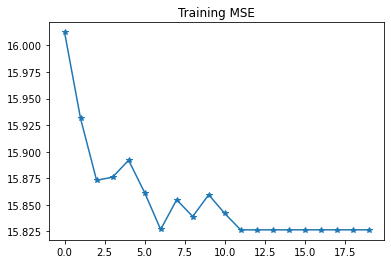

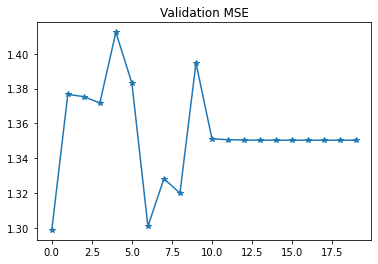

In [5]:
model.Plot()

## LSTM

In [11]:
model = Lstm("train","validation",epochs=20)

In [12]:
model.train()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 69, 8)             320       
_________________________________________________________________
bidirectional_3 (Bidirection (None, 16)                1088      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 1,425
Trainable params: 1,425
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
3125/3125 [==============================] - 1694s 542ms/step - loss: 15.8679 - mean_squared_error: 15.8679 - val_loss: 1.4389 - val_mean_squared_error: 1.4389
Epoch 2/20
3125/3125 [==============================] - 1686s 540ms/step - loss: 15.8455 - mean_squared_error: 15.8455 - val_loss: 1.4151 - val_mean_squared_error: 1.4151
Epoch 3/20
3125/3125 [=============

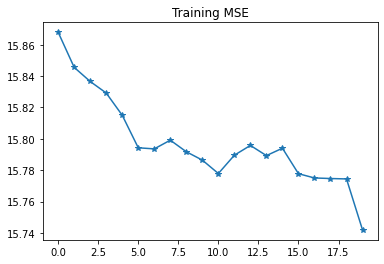

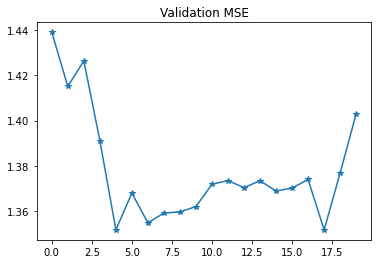

In [13]:
model.Plot()

## Conv LSTM

In [8]:
model = ConvLstm("train","validation",epochs=20)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.train()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, None, 69, 128)     256       
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 69, 128)     0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 69, 64)      8256      
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 69, 64)      4160      
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 4416)        0         
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 250)         4667000   
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 150)        

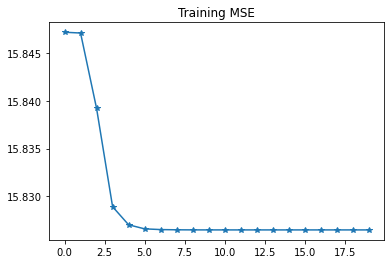

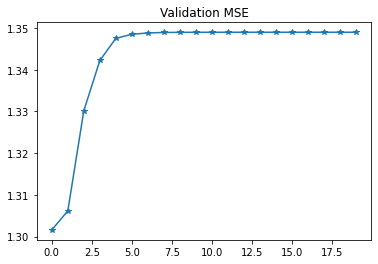

In [10]:
model.Plot()